## ÌôòÍ≤Ω ÏÑ§Ï†ï

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#Í≤ΩÍ≥†Ï∞ΩÏù¥ Îú®ÏßÄ ÏïäÎèÑÎ°ù Ìï¥Ï£ºÎäî Í≤É
import warnings
warnings.filterwarnings('ignore')

# notebookÏùÑ Ïã§ÌñâÌïú Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Î∞îÎ°ú Í∑∏Î¶ºÏùÑ Î≥º Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî Í≤É
%matplotlib inline 

**Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏãúÍ∞ÅÌôîÌï†Îïå, matplotlibÍ∞Ä ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏõêÌïòÏßÄ ÏïäÏïÑ, Íπ®Ïßê Ï≤òÎ¶¨Ìï¥Ï§òÏïº Ìï®**

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #Îß•os ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞Ïóê
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#ÏúàÎèÑÏö∞ ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞Ïóê
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 

In [4]:
 df = pd.read_csv('./NYC_taxi')

In [5]:
df.shape

(87020, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip_code     87020 non-null  int64 
 1   pickup_hour  87020 non-null  object
 2   month        87020 non-null  int64 
 3   day          87020 non-null  int64 
 4   weekday      87020 non-null  int64 
 5   hour         87020 non-null  int64 
 6   is_weekend   87020 non-null  int64 
 7   cnt          87020 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.3+ MB


In [7]:
df['zip_code'] = df['zip_code'].astype(str)
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

> zip codeÎäî Ïó∞ÏÜçÌòï Î≥ÄÏàòÍ∞Ä ÏïÑÎãàÎØÄÎ°ú strÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÏóàÏúºÎ©∞,  
> pickup_hourÎäî datetimeÏúºÎ°ú ÌÉÄÏûÖÏùÑ Î≥ÄÌôòÌï¥Ï£ºÏóàÏäµÎãàÎã§.

# EDA Í∞úÏöî
### 1) Îç∞Ïù¥ÌÑ∞ ÌååÏïÖ Î∞è Ïù¥ÏÉÅÏú†Î¨¥ ÌôïÏù∏ 
- Í∏∞Î≥∏Ï†ÅÏù∏ ÌÜµÍ≥ÑÎüâÍ≥º Î∂ÑÌè¨ ÌôïÏù∏
- Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Ïù∏Í∞Ä?  
- Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπòÎäî ÏóÜÎäîÍ∞Ä? 

In [8]:
df.head()

zip_code pickup_hour  month  day  weekday  hour  is_weekend  cnt
0    11106  2015-01-01      1    1        3     0           0   75
1    10006  2015-01-01      1    1        3     0           0   64
2    11201  2015-01-01      1    1        3     0           0  169
3    11430  2015-01-01      1    1        3     0           0  222
4    10032  2015-01-01      1    1        3     0           0   64

In [9]:
df.tail()

zip_code         pickup_hour  month  day  weekday  hour  is_weekend  cnt
87015    11219 2015-01-31 23:00:00      1   31        5    23           1    1
87016    10456 2015-01-31 23:00:00      1   31        5    23           1    3
87017    11355 2015-01-31 23:00:00      1   31        5    23           1    1
87018    11210 2015-01-31 23:00:00      1   31        5    23           1    1
87019    10167 2015-01-31 23:00:00      1   31        5    23           1    1

In [10]:
df.dtypes

zip_code               object
pickup_hour    datetime64[ns]
month                   int64
day                     int64
weekday                 int64
hour                    int64
is_weekend              int64
cnt                     int64
dtype: object

In [11]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

nan_ratio
zip_code           0.0
pickup_hour        0.0
month              0.0
day                0.0
weekday            0.0
hour               0.0
is_weekend         0.0
cnt                0.0

> Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

In [12]:
df.describe()

month           day       weekday          hour    is_weekend  \
count  87020.0  87020.000000  87020.000000  87020.000000  87020.000000   
mean       1.0     15.871685      3.169593     11.580648      0.303838   
std        0.0      8.951484      1.936788      6.973099      0.459916   
min        1.0      1.000000      0.000000      0.000000      0.000000   
25%        1.0      8.000000      2.000000      6.000000      0.000000   
50%        1.0     16.000000      3.000000     12.000000      0.000000   
75%        1.0     24.000000      5.000000     18.000000      1.000000   
max        1.0     31.000000      6.000000     23.000000      1.000000   

                cnt  
count  87020.000000  
mean     141.603080  
std      306.902683  
min        1.000000  
25%        2.000000  
50%       12.000000  
75%       80.000000  
max     2657.000000

In [13]:
df1 = df.loc[df['weekday']>=5]
df1['is_weekend'].describe()

count    26440.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_weekend, dtype: float64

> 'weekday'Îäî ÏöîÏùºÏùÑ ÎßêÌïòÎäî Î≥ÄÏàòÎ°ú 0:ÏõîÏöîÏùº ~ 6:ÏùºÏöîÏùºÏùÑ ÎúªÌï©ÎãàÎã§.  
> Ïù¥Î•º ÌÜµÌï¥, ÏöîÏùºÎ≥Ñ Ìä∏Î†åÎìúÎ•º ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§. 

# Í≥µÌÜµÏßàÎ¨∏ 

### 1Ïõî Ìïú Îã¨Í∞Ñ ÏàòÏöîÏ∂îÏù¥
- Í∏âÍ≤©Ìïú Î≥ÄÌôîÍ∞Ä ÏûàÏóàÎçò ÌäπÏ†ï ÎÇ†ÏßúÏùò ÏãúÍ∞ÑÏùÑ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî. 
- Ïôú Í∑∏Îû¨ÏùÑÍπåÏöî? Í∑∏ Ïù¥Ïú†ÎèÑ Ìï®Íªò Ï∂îÎ°†Ìï¥Ï£ºÏÑ∏Ïöî. 


In [15]:
df_jan = df.loc[df['month']==1]
df_jan.groupby('day')['cnt'].sum()

day
1     368628
2     332101
3     393493
4     319430
5     351010
6     370413
7     415036
8     434747
9     431853
10    497635
11    405036
12    383477
13    433565
14    427660
15    436115
16    462137
17    460625
18    414109
19    332160
20    392296
21    416412
22    437448
23    456631
24    447443
25    394938
26    222332
27    130322
28    367404
29    417795
30    467775
31    502274
Name: cnt, dtype: int64

In [16]:
df_jan.groupby('day')['cnt'].sum().nsmallest(5)

day
27    130322
26    222332
4     319430
2     332101
19    332160
Name: cnt, dtype: int64

> 1Ïõî 26ÏùºÍ≥º 27ÏùºÏóê ÏàòÏöîÍ∞Ä Í∏âÍ≤©ÌïòÍ≤å Ï§ÑÏñ¥Îì§ÏóàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

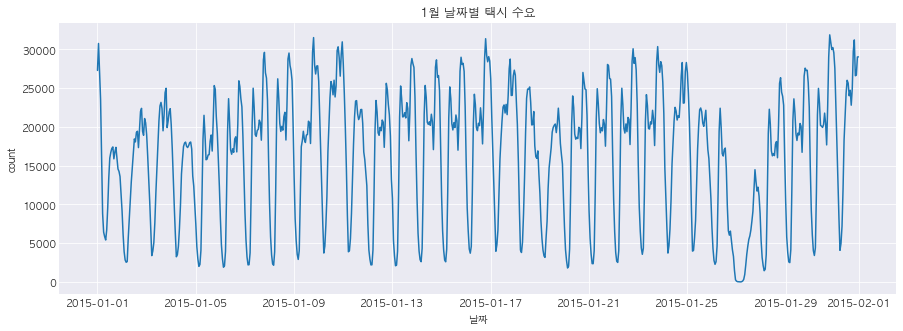

In [17]:
plt.figure(figsize=(15,5))
df_pickup_hour = df.groupby('pickup_hour').cnt.sum().to_frame()
sns.lineplot(x='pickup_hour', y='cnt', data=df_pickup_hour)
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('count')
plt.title('1Ïõî ÎÇ†ÏßúÎ≥Ñ ÌÉùÏãú ÏàòÏöî')
plt.show()

> 2015-01-25Î∂ÄÌÑ∞ 2015-01-29ÏÇ¨Ïù¥Ïóê ÏàòÏöîÍ∞Ä Í∏âÍ≤©ÌïòÍ≤å Ï§ÑÏñ¥Îì† ÎÇ†ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
> ÎòêÌïú, ÎÇ†ÏßúÎ≥Ñ ÌÉùÏãú ÏàòÏöîÎ•º ÌååÌó§Ï≥êÎ≥¥Î©¥ ÌäπÏ†ï ÎÇ†ÏßúÎ•º Ï†úÏô∏ÌïòÍ≥†Îäî Í∞Å Ï£ºÎßàÎã§Ïùò ÏöîÏùºÎ≥Ñ Ïù¥Ïö©Í∏∞Î°ù Î∂ÑÌè¨Í∞Ä Î∞òÎ≥µÎêòÍ≥† ÏûàÏùåÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§. 

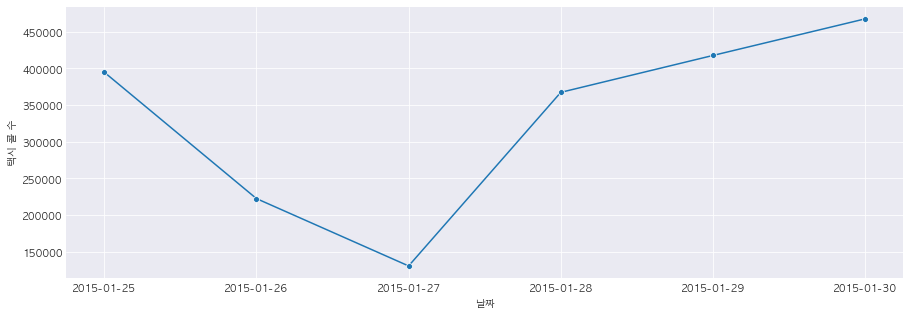

In [18]:
plt.figure(figsize=(15,5))

df['date'] = df['pickup_hour'].dt.date
df_date = df.groupby('date').cnt.sum().to_frame()
sns.lineplot(x='date', y='cnt', data=df_date.iloc[24:30], marker='o')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌÉùÏãú ÏΩú Ïàò')
plt.show()

> ÌäπÏ†ï ÎÇ†ÏßúÍ∞Ä 2015-01-27Ïù∏ Í≤ÉÏùÑ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ÏÑúÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

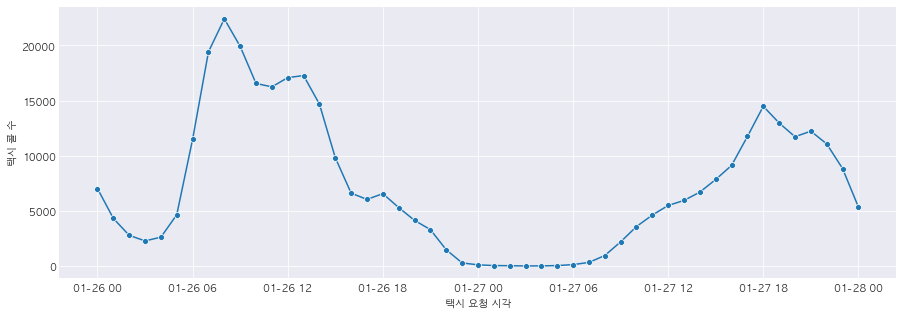

In [19]:
plt.figure(figsize=(15,5))
df_hour = df.groupby('pickup_hour').cnt.sum().to_frame()
df_hour = df_hour.loc['2015-01-26 00:00:00' : '2015-01-28 00:00:00']
sns.lineplot(x='pickup_hour', y='cnt', data=df_hour, marker = 'o')
plt.xlabel('ÌÉùÏãú ÏöîÏ≤≠ ÏãúÍ∞Å')
plt.ylabel('ÌÉùÏãú ÏΩú Ïàò')
plt.show()

> 2015-01-27 00ÏãúÎ∂ÄÌÑ∞ 06ÏãúÍπåÏßÄÎäî ÏàòÏöîÍ∞Ä Í±∞Ïùò 0Ïóê Í∑ºÏ†ëÌïòÏòÄÏäµÎãàÎã§.    

> 2015ÎÖÑ 1Ïõî 27Ïùº call ÏàòÍ∞Ä Ï†ÄÏ°∞ÌñàÎçò Ïù¥Ïú† : ÎåÄÍ∑úÎ™® Ìè≠ÏÑ§ blizzard  
https://en.wikipedia.org/wiki/January_2015_North_American_blizzard

>" De Blasio ordered all vehicles off the streets by 11 pm on January 26, and declared that, with the exception of emergency and government vehicles, anyone driving in New York City after 11 pm on January 26 would be fined. "

        -> new york ÏãúÎÇ¥Ïóê ÌÜµÍ∏àÎ†πÏù¥ ÎÇ¥Î†§Ïßà ÎßåÌÅº Ïã¨Í∞ÅÌñàÏóàÏäµÎãàÎã§.

### 2) Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú 
- Îã§ÏñëÌïú Í∞ÅÎèÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑù&ÏãúÍ∞ÅÌôî 
- Î∂ÑÏÑùÍ≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï¥Î≥¥Í∏∞, Ïôú Í∑∏Îü¥Íπå?
- Ìï¥ÏÑùÍ≤∞Í≥º ÌôúÏö©Î∞©Ïïà ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞, Ïñ¥ÎñªÍ≤å ÌôúÏö©Ìï† Ïàò ÏûàÏùÑÍπå?

 - ex) 1Ïõî ÏàòÏöîÎ≥ÄÌôîÏ∂îÏù¥, ÏãúÍ∞ÑÎåÄÎ≥Ñ/ÏöîÏùºÎ≥Ñ Ìä∏Î†åÎìú, Í∞ÄÏû• ÏàòÏöîÍ∞Ä ÎßéÏùÄ ÏßÄÏó≠ÏùÄ? 
 - ex) Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞, Í∑∏Î£πÎ≥Ñ ÎßâÎåÄÍ∑∏ÎûòÌîÑ Ï∞çÏñ¥Î≥¥Í∏∞, 2Í∞ÄÏßÄ Ï∂ïÏúºÎ°ú ÌûàÌä∏Îßµ Í∑∏Î†§Î≥¥Í∏∞ 

#### ÏöîÏùºÎ≥Ñ ÌÉùÏãú ÏàòÏöî Ìä∏Î†åÎìú

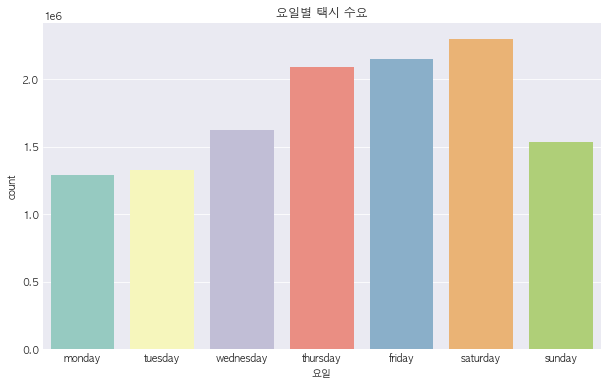

In [20]:
plt.figure(figsize=(10,6))
df_weekday = df.groupby('weekday').cnt.sum()
df_weekday

cnt = sns.barplot(x=df_weekday.index, y=df_weekday.values, palette='Set3') 
plt.xlabel("ÏöîÏùº")
plt.ylabel("count")
plt.title("ÏöîÏùºÎ≥Ñ ÌÉùÏãú ÏàòÏöî")
plt.xticks([0,1,2,3,4,5,6], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.show()

> Ïù¥Îïå ÏùºÏöîÏùºÎ∂ÄÌÑ∞ ÏàòÏöîÏùºÍπåÏßÄÎäî Î™©,Í∏à,ÌÜ†Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏàòÏöîÍ∞Ä Ï†ÅÏäµÎãàÎã§. Ïù¥Îäî, ÏÇ¨ÎûåÎì§Ïù¥ Î™©,Í∏à,ÌÜ†Ïóê Ï†ÄÎÖÅÏïΩÏÜçÏù¥ ÎßéÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§.  

#### ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÉùÏãú ÏàòÏöî Ìä∏Î†åÎìú

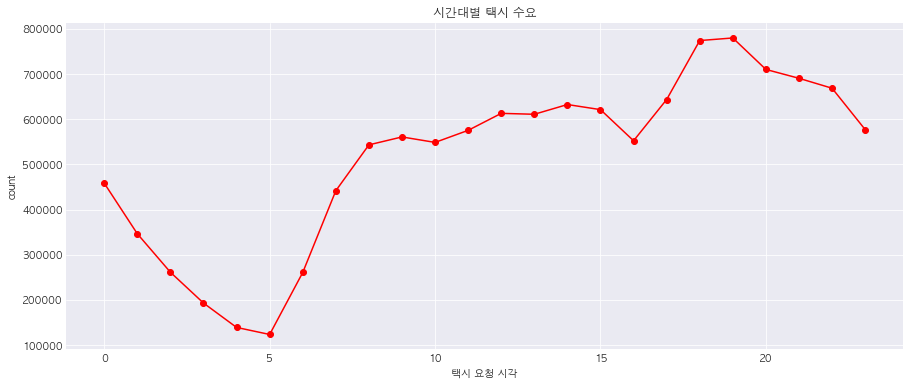

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df.groupby('hour').cnt.sum(), marker = 'o', c = 'r')
plt.xlabel('ÌÉùÏãú ÏöîÏ≤≠ ÏãúÍ∞Å')
plt.ylabel('count')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÉùÏãú ÏàòÏöî')
plt.show()

> '5ÏãúÎ∂ÄÌÑ∞ 9Ïãú','16ÏãúÎ∂ÄÌÑ∞ 19Ïãú' ÏÇ¨Ïù¥Ïùò ÏãúÍ∞ÑÎåÄÏóê ÌÉùÏãú ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÌÜµÌï¥ Ï∂úÌá¥Í∑ºÏúºÎ°ú Ïù∏Ìï¥ ÌÉùÏãú ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌïú Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
> ÎòêÌïú, '16ÏãúÎ∂ÄÌÑ∞ 19Ïãú'Ïùò ÏãúÍ∞ÑÎåÄÏóêÎäî Ï†ÄÎÖÅ ÏïΩÏÜçÏùÑ ÏúÑÌïú Ïù¥ÎèôÏúºÎ°ú Ïù∏Ìï¥ÏÑúÎèÑ ÌÉùÏãú ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌïú Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÏãúÍ∞ÑÎåÄÏôÄ ÏöîÏùºÎ≥Ñ ÌÉùÏãú ÏàòÏöî Ìä∏Î†åÎìú

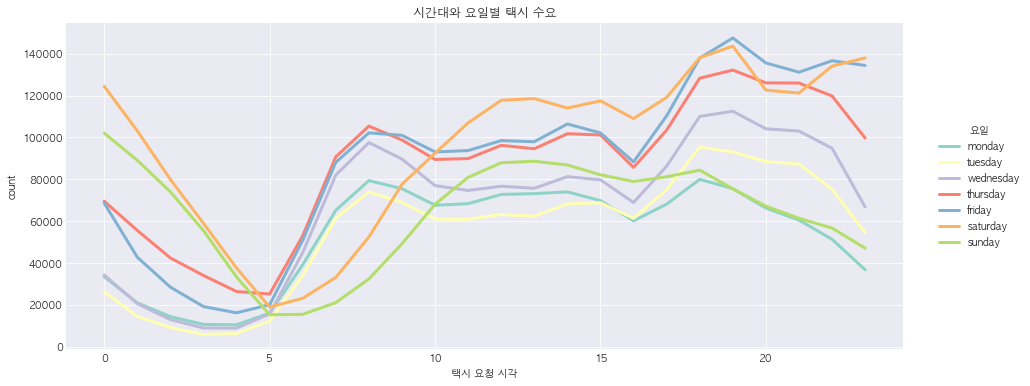

In [22]:
plt.figure(figsize=(15,6))
df_hour_weekday = df.groupby(['hour', 'weekday']).cnt.sum().unstack(1)
sns.lineplot(data = df_hour_weekday, palette='Set3', linewidth=3, dashes=False)
plt.legend(labels = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 
           loc='right', bbox_to_anchor=(1.15, 0.5), title='ÏöîÏùº')
plt.xlabel('ÌÉùÏãú ÏöîÏ≤≠ ÏãúÍ∞Å')
plt.ylabel('count')
plt.title('ÏãúÍ∞ÑÎåÄÏôÄ ÏöîÏùºÎ≥Ñ ÌÉùÏãú ÏàòÏöî')
plt.show()

> Ïò§Ï†Ñ 10ÏãúÎ∂ÄÌÑ∞ ÏûêÏ†ïÍπåÏßÄÎäî Î™©ÏöîÏùº, Í∏àÏöîÏùº, ÌÜ†ÏöîÏùºÏùò ÏàòÏöîÍ∞Ä Îã§Î•∏ ÏöîÏùºÎì§Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎßéÏäµÎãàÎã§.  
> Ïù¥Îäî, ÏÇ¨ÎûåÎì§Ïù¥ Ìï¥Îãπ ÏöîÏùºÏóê Îçî ÎßéÏùÄ ÏïΩÏÜçÏùÑ Ïû°Í∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

> Ïò§Ï†Ñ 5ÏãúÎ∂ÄÌÑ∞ Ïò§Ï†Ñ 9ÏãúÍπåÏßÄÎäî ÌèâÏùºÏù¥ Ï£ºÎßêÎ≥¥Îã§ ÌÉùÏãú ÏàòÏöîÍ∞Ä ÎßéÏäµÎãàÎã§. Ïù¥Îäî, Ï∂úÍ∑ºÏùÑ ÌïòÎäî Ï£ºÏ§ëÏóê ÌÉùÏãúÎ•º Ïù¥Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Îê©ÎãàÎã§.

> Í∏àÏöîÏùºÍ≥º ÌÜ†ÏöîÏùºÏùÄ 20Ïãú Ïù¥ÌõÑ ÏàòÏöîÍ∞Ä Ï§ÑÏñ¥Îì§ÏßÄ ÏïäÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Î©∞, ÌÜ†ÏöîÏùºÍ≥º ÏùºÏöîÏùºÏùÄ 0ÏãúÎ∂ÄÌÑ∞ 5ÏãúÍπåÏßÄÏùò ÏàòÏöîÍ∞Ä ÌèâÏùºÎ≥¥Îã§ ÎßéÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.  
> Î∂àÍ∏àÍ≥º Î∂àÌÜ†Îäî ÎßåÍµ≠ Í≥µÌÜµÏù∏ Í≤É Í∞ôÏäµÎãàÎã§.  

#### Ï£ºÏ§ëÍ≥º Ï£ºÎßêÏùò ÌÉùÏãú ÏàòÏöî Ìä∏Î†åÎìú

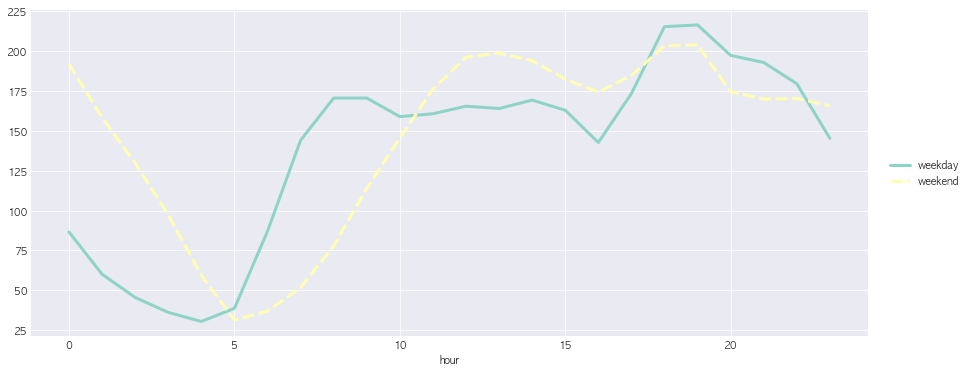

In [23]:
plt.figure(figsize=(15,6))
df_weekend = df.groupby(['hour', 'is_weekend']).cnt.mean().unstack(1)
sns.lineplot(data = df_weekend, palette='Set3', linewidth=3)
plt.legend(labels = ['weekday', 'weekend'], 
           loc='right', bbox_to_anchor=(1.12, 0.5))
plt.show()

> Ï£ºÏ§ëÍ≥º Ï£ºÎßêÏùò Ï∞®Ïù¥Í∞Ä ÏÉàÎ≤ΩÏãúÍ∞ÑÎåÄ, ÏïÑÏπ®ÏãúÍ∞ÑÎåÄÏóê ÌôïÏó∞ÌïòÍ≤å ÎìúÎü¨ÎÇòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÏßÄÏó≠Î≥Ñ ÌÉùÏãú ÏàòÏöî Ìä∏Î†åÎìú

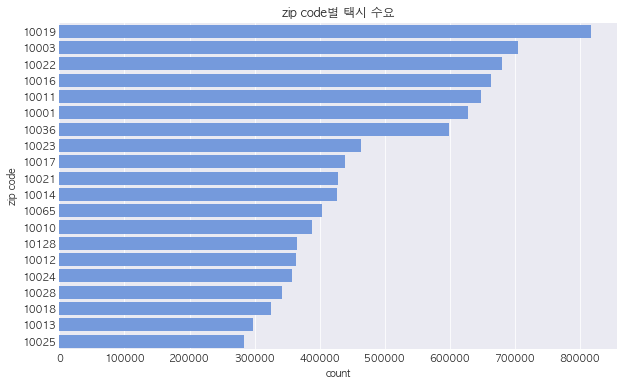

In [24]:
plt.figure(figsize=(10,6))
df_zip_sort = df.groupby('zip_code').cnt.sum().nlargest(20)
sns.barplot(x=df_zip_sort.values, y=df_zip_sort.index, color='cornflowerblue') 
plt.ylabel("zip code")
plt.xlabel("count")
plt.title("zip codeÎ≥Ñ ÌÉùÏãú ÏàòÏöî")
plt.show()

> zip_code 10019ÏóêÏÑú Í∞ÄÏû• ÏàòÏöîÍ∞Ä ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÏßÄÏó≠Í≥º ÏãúÍ∞ÑÎ≥Ñ ÌÉùÏãú ÏàòÏöî ÌûàÌä∏Îßµ

In [25]:
df_zip = df[df['zip_code'].isin(df_zip_sort.index)]

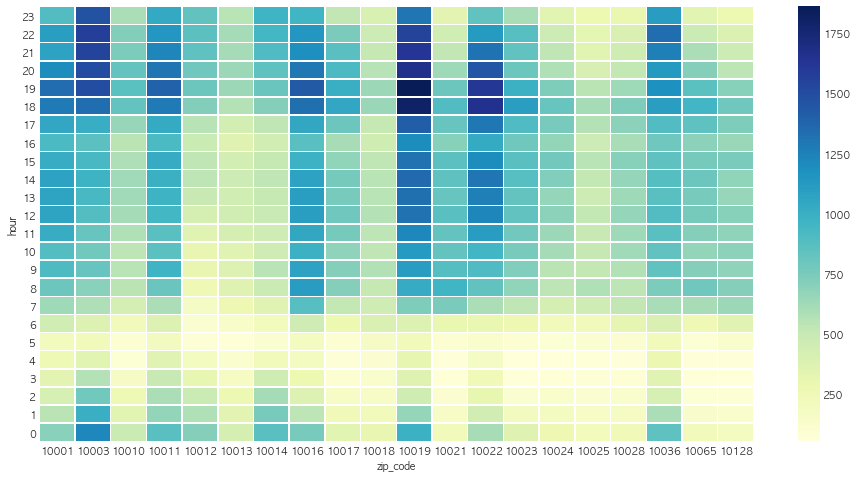

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['hour', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks(rotation=0)
plt.show()

> ÎåÄÏ≤¥Î°ú 2ÏãúÎ∂ÄÌÑ∞ 6ÏãúÍπåÏßÄÎäî ÏàòÏöîÍ∞Ä ÏóÜÎã§Í∞Ä, Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄÏóê ÏàòÏöîÍ∞Ä ÎäòÏñ¥ÎÇòÎ©¥ÏÑú ÌèâÍ∑†Ï†ÅÏúºÎ°ú 18Ïãú, 19ÏãúÏóê ÏàòÏöîÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

> 10003, 10011, 10012, 10014, 10019 ÏßÄÏó≠Îì§ÏóêÏÑúÎäî Î∞§~ÏÉàÎ≤Ω ÏãúÍ∞ÑÎåÄÍπåÏßÄ ÌÉùÏãú ÏàòÏöîÍ∞Ä ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ  
> Î≤àÌôîÍ∞ÄÍ∞Ä ÏúÑÏπòÌïòÏòÄÍ±∞ÎÇò Ïú†ÎèôÏù∏Íµ¨Í∞Ä ÎßéÏùÄ Í≥≥Ïù¥ÎùºÍ≥† Ï∂îÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÏßÄÏó≠Í≥º ÎÇ†ÏßúÎ≥Ñ ÌÉùÏãú ÏàòÏöî ÌûàÌä∏Îßµ

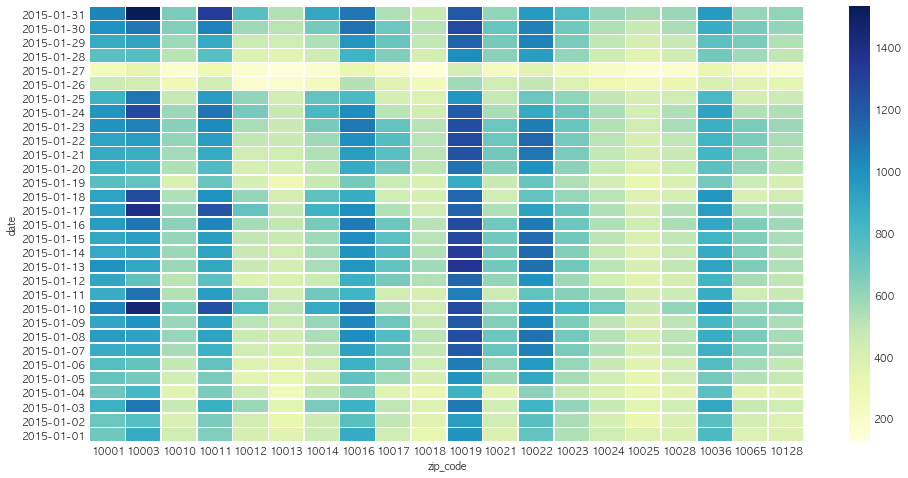

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['date', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks(rotation=0)
plt.show()

> Ìè≠ÏÑ§Ïù¥ ÏôîÏóàÎçò 27ÏùºÏùÄ **Î™®Îì† ÏßÄÏó≠**ÏóêÏÑú 1Ïõî Ï§ë Í∞ÄÏû• ÏàòÏöîÍ∞Ä Ï†ÅÏùÄ ÎÇ†Ïù¥ÏòÄÏäµÎãàÎã§.

> 10003, 10011, 100012, 10014 ÏßÄÏó≠Îì§ÏóêÏÑúÎäî ÏùºÏ£ºÏùº Í∞ÑÍ≤©ÏúºÎ°ú ÏàòÏöîÍ∞Ä ÎßéÏùÄ ÎÇ†Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.   
> ÏïÑÎûò ÏûêÎ£åÎ•º Î≥¥Î©¥, Í∑∏ ÎÇ†Ïùò ÏöîÏùºÏùÄ ÌÜ†ÏöîÏùºÏù¥ÎùºÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏúºÎ©∞,  
> ÏúÑ ÏßÄÏó≠Îì§Ïù¥ ÏúÑÏóêÏÑú ÏÇ¥Ìé¥Î≥∏ ÏÉàÎ≤Ω ÏãúÍ∞ÑÎåÄ ÏàòÏöîÍ∞Ä ÎßéÏùÄ ÏßÄÏó≠Îì§Í≥º ÎåÄÎã§Ïàò ÏùºÏπòÌïòÎØÄÎ°ú <u>Î≤àÌôîÍ∞ÄÍ∞Ä ÏúÑÏπòÌïú ÏßÄÏó≠</u>Ïù¥ÎùºÍ≥† ÌôïÏã†Ìï† Ïàò ÏûàÏäµÎãàÎã§.

> 10001, 10016, 10019, 10022, 10023, 10036 ÏßÄÏó≠Îì§ÏóêÏÑúÎäî ÏàòÏöîÍ∞Ä ÌèâÏù¥Ìïú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏúºÎ©∞, ÏùºÏöîÏùºÏóê ÏàòÏöîÍ∞Ä Ï†ÅÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
> Ïù¥Î•º ÌÜµÌï¥, ÏúÑ ÏßÄÏó≠Îì§ÏùÄ <u>ÌöåÏÇ¨Í∞Ä ÎßéÏù¥ ÏúÑÏπòÌïòÏó¨ Ï£ºÏ§ëÏóê ÏàòÏöîÍ∞Ä ÎπÑÍµêÏ†Å ÏùºÍ¥ÄÎêòÍ≤å Ïú†ÏßÄÎêòÎäî Í≤É</u>Ïù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

In [28]:
df_zip.groupby('date').weekday.mean()

date
2015-01-01    3
2015-01-02    4
2015-01-03    5
2015-01-04    6
2015-01-05    0
2015-01-06    1
2015-01-07    2
2015-01-08    3
2015-01-09    4
2015-01-10    5
2015-01-11    6
2015-01-12    0
2015-01-13    1
2015-01-14    2
2015-01-15    3
2015-01-16    4
2015-01-17    5
2015-01-18    6
2015-01-19    0
2015-01-20    1
2015-01-21    2
2015-01-22    3
2015-01-23    4
2015-01-24    5
2015-01-25    6
2015-01-26    0
2015-01-27    1
2015-01-28    2
2015-01-29    3
2015-01-30    4
2015-01-31    5
Name: weekday, dtype: int64

#### ÏßÄÏó≠Í≥º ÏöîÏùºÎ≥Ñ ÌÉùÏãú ÏàòÏöî ÌûàÌä∏Îßµ

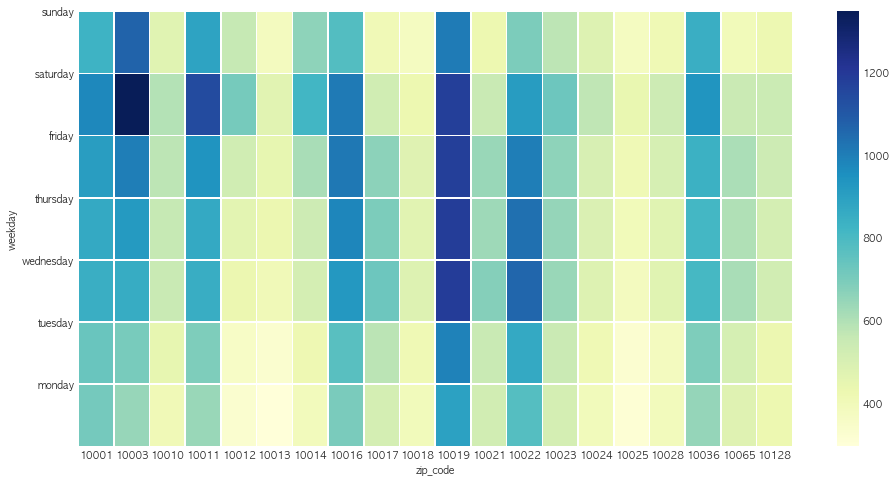

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(df_zip.groupby(['weekday', 'zip_code']).cnt.mean().unstack(1).sort_index(ascending=False), cmap='YlGnBu', lw=0.5)
plt.yticks([6,5,4,3,2,1,0], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], rotation=0)
plt.show()

> Î™®Îì† ÏßÄÏó≠ÏóêÏÑú ÌÜ†ÏöîÏùºÏóê Í∞ÄÏû• ÏàòÏöîÍ∞Ä ÎßéÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
> 10019 ÏßÄÏó≠ÏùÄ ÌÉùÏãú ÏàòÏöîÍ∞Ä Îã§Î•∏ ÏßÄÏó≠Ïóê ÎπÑÌï¥ ÏõîÎì±Ìûà ÎßéÏùÄÎç∞ **ÏßÄÏó≠Ïùò Ïù∏Íµ¨Í∞Ä ÎßéÏùÄ Í≤ÉÏù¥ ÏõêÏù∏**ÏùºÏßÄ Í∂ÅÍ∏àÏ¶ùÏù¥ ÏÉùÍ≤® ÏïåÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

#### zip codeÎ≥Ñ ÏúÑÎèÑ, Í≤ΩÎèÑ, Ïù∏Íµ¨ Ïàò Î∂àÎü¨Ïò§Í∏∞

In [30]:
zipcode = pd.read_csv('./zip_code_database.csv')

In [31]:
zipcode.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                           Internal Revenue Service    NY   
1                           Internal Revenue Service    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population  
0     40.81     -73.04                       562  
1     40.81     -73.04                         0  
2     18.16     -66.72                         0  
3     18.38     -67.18                         0  
4     18.43     -67.15                         0

> ÌïÑÏöîÌïú ÌñâÍ≥º Ïó¥Îì§Îßå Ï∂îÏ∂úÌï¥Ï§çÎãàÎã§.

In [32]:
zipcode = zipcode.iloc[3757:5877, [0, 12, 13, 14]]
zipcode

zip  latitude  longitude  irs_estimated_population
3757  10001     40.75     -74.00                     21760
3758  10002     40.71     -73.99                     67080
3759  10003     40.73     -73.99                     38080
3760  10004     40.69     -74.02                      4280
3761  10005     40.71     -74.01                      8280
...     ...       ...        ...                       ...
5872  14785     42.15     -79.41                       174
5873  14786     42.13     -78.25                       222
5874  14787     42.32     -79.57                      4010
5875  14788     42.06     -78.38                       248
5876  14801     42.10     -77.23                      4600

[2120 rows x 4 columns]

In [33]:
zipcode['zip'] = zipcode['zip'].astype(str)

#### Í∏∞Ï°¥ data frameÍ≥º merge

In [34]:
df_merge = pd.merge(df, zipcode, left_on='zip_code', right_on='zip')
df_merge

zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
0        11106 2015-01-01 00:00:00      1    1        3     0           0   
1        11106 2015-01-01 01:00:00      1    1        3     1           0   
2        11106 2015-01-01 02:00:00      1    1        3     2           0   
3        11106 2015-01-01 03:00:00      1    1        3     3           0   
4        11106 2015-01-01 04:00:00      1    1        3     4           0   
...        ...                 ...    ...  ...      ...   ...         ...   
87015    10941 2015-01-30 09:00:00      1   30        4     9           0   
87016    11780 2015-01-30 09:00:00      1   30        4     9           0   
87017    11507 2015-01-30 14:00:00      1   30        4    14           0   
87018    14801 2015-01-30 21:00:00      1   30        4    21           0   
87019    10917 2015-01-31 10:00:00      1   31        5    10           1   

       cnt        date    zip  latitude  longitude  irs_estimated_population  
0       75  2015-01-01  11106     40.76     -73.93                     34880  
1      152  2015-01-01  11106     40.76     -73.93                     34880  
2      192  2015-01-01  11106     40.76     -73.93                     34880  
3      179  2015-01-01  11106     40.76     -73.93                     34880  
4      130  2015-01-01  11106     40.76     -73.93                     34880  
...    ...         ...    ...       ...        ...                       ...  
87015    1  2015-01-30  10941     41.49     -74.34                     13420  
87016    1  2015-01-30  11780     40.87     -73.15                     14780  
87017    1  2015-01-30  11507     40.77     -73.64                      7620  
87018    1  2015-01-30  14801     42.10     -77.23                      4600  
87019    1  2015-01-31  10917     41.32     -74.12                      2070  

[87020 rows x 13 columns]

In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   zip_code                  87020 non-null  object        
 1   pickup_hour               87020 non-null  datetime64[ns]
 2   month                     87020 non-null  int64         
 3   day                       87020 non-null  int64         
 4   weekday                   87020 non-null  int64         
 5   hour                      87020 non-null  int64         
 6   is_weekend                87020 non-null  int64         
 7   cnt                       87020 non-null  int64         
 8   date                      87020 non-null  object        
 9   zip                       87020 non-null  object        
 10  latitude                  87020 non-null  float64       
 11  longitude                 87020 non-null  float64       
 12  irs_estimated_popu

> Í≤∞Ï∏°Ïπò ÏóÜÏù¥ mergeÍ∞Ä Ïûò ÏàòÌñâÎêòÏóàÏäµÎãàÎã§.

#### Ïù∏Íµ¨Ïàò top 30 ÏßÄÏó≠Ïùò heatmap

In [36]:
import folium

base_map = folium.Map(location=[df_merge['latitude'].mean(),df_merge['longitude'].mean()],
                      control_scale=True,
                      scrollWheelZoom=False,
                      zoom_start=11)

top_pop = df_merge.groupby(['latitude', 'longitude']).irs_estimated_population.mean().nlargest(30).to_frame().reset_index()

for i in range(0,len(top_pop)): 
    folium.Marker([top_pop.iloc[i]['latitude'], top_pop.iloc[i]['longitude']], 
                  popup='population: ' + str(top_pop.iloc[i]['irs_estimated_population']), 
                  icon=folium.Icon(icon="home", prefix="fa", color="green")
                 ).add_to(base_map)

base_map

#### cnt top 30 ÏßÄÏó≠Ïóê marker Ï∂îÍ∞Ä

In [37]:
top_cnt = df_merge.groupby(['latitude', 'longitude']).cnt.sum().nlargest(30).to_frame().reset_index()

for i in range(0,len(top_cnt)): 
    folium.Marker([top_cnt.iloc[i]['latitude'], top_cnt.iloc[i]['longitude']],
                  popup='count: ' + str(top_cnt.iloc[i]['cnt']),
                  icon=folium.Icon(icon="car", prefix="fa", color="blue")
                 ).add_to(base_map)

top_cnt_pop = pd.merge(top_pop, top_cnt, on=['latitude', 'longitude'])

for i in range(0, len(top_cnt_pop)):
    folium.Marker([top_cnt_pop.iloc[i]['latitude'], top_cnt_pop.iloc[i]['longitude']],
                  popup='count: ' + str(top_cnt_pop.iloc[i]['cnt']) + "<br/>" + 'population: ' + str(top_pop.iloc[i]['irs_estimated_population']),
                  icon=folium.Icon(icon="user", prefix="fa", color="red")
                 ).add_to(base_map)
    
base_map


> Ïù∏Íµ¨ ÏàòÍ∞Ä ÎßéÏïÑÎèÑ ÌÉùÏãú ÏàòÏöîÎäî ÎßéÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ï£ºÍ±∞ÏßÄÏóêÏÑú ÌÉùÏãú ÏàòÏöîÎäî Ï†ÅÏúºÎ©∞, Í∑ºÎ¨¥ÏßÄ ÎòêÎäî Î≤àÌôîÍ∞ÄÏóêÏÑú ÌÉùÏãú ÏàòÏöîÍ∞Ä ÎßéÏùÄ Í≤ÉÏúºÎ°ú Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

# Î™©Ï†ÅÍ≥º ÌôúÏö©Î∞©ÏïàÍπåÏßÄ Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Ï†úÏïàÌï¥Î≥¥Îäî EDA

### Ï†ÑÏ≤¥ EDA Ï§ë ÏµúÏÜå 1Í∞ÄÏßÄ Ïù¥ÏÉÅ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§! 


1) Ïñ¥Îñ§ Í∏∞ÏóÖÏùò Íµ¨Ï≤¥Ï†ÅÏù∏ ÏÉÅÌô©Ïù¥ÎÇò ÎãàÏ¶àÏóê Í≥ºÎ™∞ÏûÖ Ìï¥Î¥ÖÏãúÎã§! 
- Ï£ºÏ≤¥Í∞Ä Íº≠ Í∏∞ÏóÖÏù¥ ÏïÑÎãàÏñ¥ÎèÑ ÎêúÎã§! 
- Ex) Î™®ÎπåÎ¶¨Ìã∞ ÌîåÎû´ÌèºÏóêÍ≤ê Ïö¥Ï†ÑÍ∏∞ÏÇ¨ÎèÑ Ï£ºÏöî ÌååÌä∏ÎÑà Í≥†Í∞ù, Ïö¥Ï†ÑÍ∏∞ÏÇ¨ÏóêÍ≤å Ïª®ÏÑ§ÌåÖÏùÑ Ìï¥Ï§ÄÎã§Î©¥? 
	ÌòπÏùÄ, Ï†ïÎ∂ÄÍ∏∞Í¥ÄÏùÑ ÏÑ§ÎìùÌïòÍ∏∞ ÏúÑÌï¥, Îç∞Ïù¥ÌÑ∞Î°ú Ïñ¥Îñ§ ÏÇ¨ÌöåÎ¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÏùåÏùÑ Ïñ¥ÌïÑÌïúÎã§Î©¥?
¬†
2) Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïóê ÌïúÏ†ïÎêòÏßÄ ÎßêÍ≥†, Îçî ÎÑìÏùÄ Î≤îÏúÑÏùò ÌôúÏö©Í∞ÄÎä•ÏÑ±ÏùÑ ÏÉùÍ∞ÅÌï¥Î≥¥ÏÑ∏Ïöî! 
- ~Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Îçî ÏûàÎã§Î©¥, ~Î•º Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. 
- Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê ÎçîÎ∂àÏñ¥, ÏûêÎ£åÏ°∞ÏÇ¨Î•º ÌÜµÌï¥ ÎÖºÎ¶¨Î•º ÏôÑÏÑ±Ìï¥ÎèÑ Îê®, ex) ÌÜµÍ≥ÑÏ≤≠, ÏÇ∞ÏóÖ Î≥¥Í≥†ÏÑúÏóê Îî∞Î•¥Î©¥ 


# Ï¢ÖÏõê ÎãòÏù¥ pptÎ•º ÌÜµÌï¥ ÏÑ§Î™ÖÌï¥Ï£ºÏã§ ÏòàÏ†ïÏûÖÎãàÎã§~~ üëèüëèüëè